In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle

import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


### Load the data

In [5]:
path_to_data = './'
QpxQpy="1"
study_name = f'deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesOFFvsON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_ayyScan' # title for save figures
study_name_1 = f'deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesOFF_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_ayyScan'
study_name_2 = f'deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [6]:
my_df_2

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,"[2.307263533898316e-08, 2.6992127224926792e-08...","[2.3077657022031244e-08, 2.6384732186024524e-0...","[2.3110299701032653e-08, 2.5196889738223894e-0...","[2.341563105761896e-08, 2.656425158238213e-08,...","[2.2950513587243785e-08, 2.6027843410922056e-0...","[2.384053879452663e-08, 2.459880264480675e-08,...","[2.3746522960587492e-08, 2.1590498858754818e-0...","[2.1419794047755453e-08, 1.855000120452608e-08...","[1.513754279142741e-08, 1.5591757249547024e-08...","[7.234426573602167e-09, 7.541824715250935e-09,...",...,"[6.556372411527153e-09, 6.014937754607711e-09,...","[8.766257978697333e-09, 8.073199219913989e-09,...","[9.969798862928809e-09, 9.070909216277048e-09,...","[1.0600782940256667e-08, 1.1222535440091427e-0...","[1.2180576665189413e-08, 1.3000060510367592e-0...","[1.3888621650996528e-08, 1.4050948901946764e-0...","[1.383837984231678e-08, 1.716895767564151e-08,...","[1.598057763536482e-08, 1.5971005011882717e-08...","[2.181224201005261e-08, 1.698950900505547e-08,...","[2.292936134470612e-08, 1.9678665853354407e-08..."
b,"[2.3007627479428634e-06, 2.298068702642977e-06...","[2.3001251816159374e-06, 2.2969109387554188e-0...","[2.302424684548951e-06, 2.2992540013278675e-06...","[2.3015706686913703e-06, 2.296489938364571e-06...","[2.3022746076477044e-06, 2.294435484143012e-06...","[2.3012165017641717e-06, 2.298798239498938e-06...","[2.2995418731619852e-06, 2.3019813307982515e-0...","[2.297368413409171e-06, 2.2955571217955366e-06...","[2.3015183792961708e-06, 2.2954273763989727e-0...","[2.3004204747937202e-06, 2.298699812650547e-06...",...,"[2.3010220304756845e-06, 2.301588744621448e-06...","[2.300157490888283e-06, 2.300966891913458e-06,...","[2.3004031700302347e-06, 2.299578781446379e-06...","[2.3011153370719067e-06, 2.298845116522017e-06...","[2.302260596808829e-06, 2.2985020122243e-06, 2...","[2.2996287223130284e-06, 2.297578135707217e-06...","[2.3064584903577307e-06, 2.2999805521776357e-0...","[2.299923615989646e-06, 2.30272823650207e-06, ...","[2.300818385085158e-06, 2.301894380049541e-06,...","[2.3004719516353393e-06, 2.3021732294149885e-0..."
err,"[3.758614238285996e-11, 4.951124296660413e-11,...","[4.478424483275867e-11, 5.1440982632944805e-11...","[4.658019620120439e-11, 5.399366042860376e-11,...","[5.1727325806641484e-11, 7.752070143199623e-11...","[5.646213788433823e-11, 8.270785378932191e-11,...","[5.3834991976354037e-11, 7.789421430437101e-11...","[5.561140100872751e-11, 4.586703194449747e-11,...","[6.416713259416414e-11, 4.080538695137673e-11,...","[5.982210231184225e-11, 8.367239648960414e-11,...","[3.1797621102788474e-11, 3.501146507886605e-11...",...,"[3.430777064325602e-11, 2.1356134314760365e-11...","[5.4864085811726466e-11, 5.67996804663311e-11,...","[3.351675271845491e-11, 3.171010135493844e-11,...","[7.408637499872784e-11, 8.064290620160919e-11,...","[4.9831003543321567e-11, 6.252772087968379e-11...","[4.1786777470492564e-11, 6.50219346406275e-11,...","[1.1696960729010687e-10, 7.85193045668322e-11,...","[8.420244841530423e-11, 5.257624930503279e-11,...","[8.196654017503508e-11, 8.787603379220556e-11,...","[1.4507505724159964e-10, 1.0430828001945694e-1..."


In [7]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

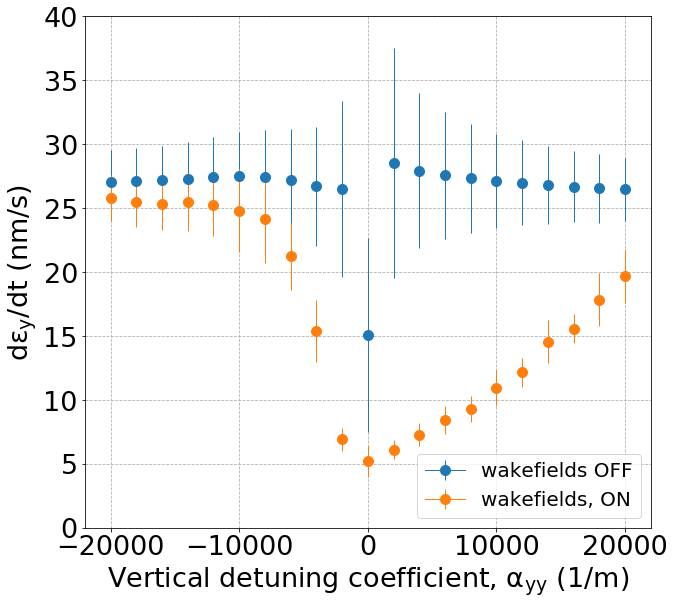

In [8]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [9]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
tau = 1.6e-9 # 4 sigma_t [s]
sigma_z = clight*tau/4 #0.155  # m
print(f'sigma_z = {sigma_z} m')
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

sigma_z = 0.11991698320000001 m
psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [10]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5662418949549224, CDeltaA = 0.21687905252253867
expected growth = 26.08911635570511 nm/s


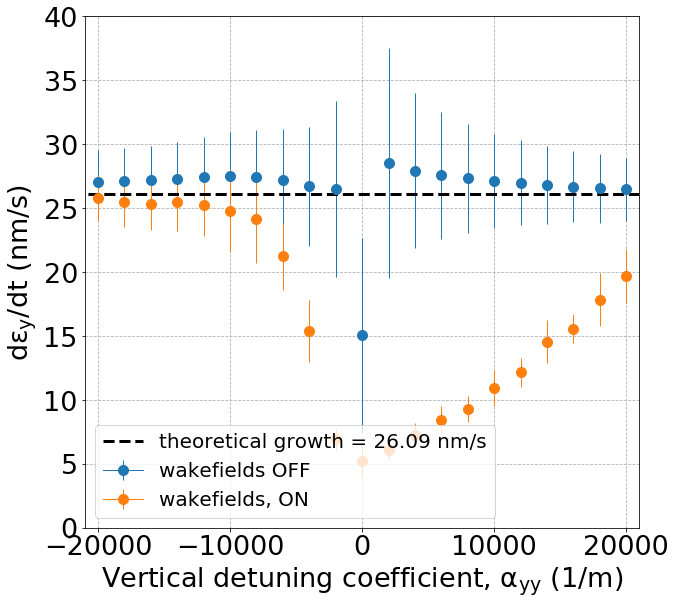

In [11]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -22000., 22000., linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=3)

plt.xlim(-21000, 21000)
plt.ylim(0, 40)

plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [12]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch_emity2.3um', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.13.5




In [13]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.94597942384069e-09 m
rms(Jy)=7.990267209372901e-09 m


In [14]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

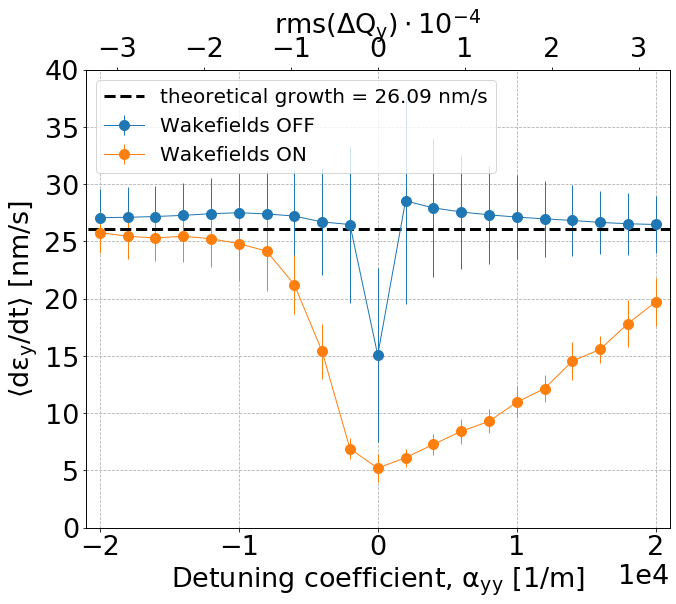

In [15]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'Wakefields OFF'
        my_label_2 = 'Wakefields ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=2)

#ax2.set_xlim(-3*21000*rms_Jy_init*1e4, 3*21000*rms_Jy_init*1e4)
ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
#ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

### Plot expected rms amplitude detuning of SPS for the current settings
- b3b5b7 included 
- chroma match at the current setting (contribution from the chromatic sextupoles)
- klof=klod=1 $1/m^4$
- axy and ayy values as shown below are obtained from MAD-X
    link to script: https://github.com/natriant/exploring_SPS/blob/master/coherent_and_incoherent_tuneShift/job000_cmpt_SPS_detuning_ceofficients_madx.ipynb

In [16]:
if QpxQpy == "0":  
    axy_sps = -1484.124066 # for Qpx=Qpy=0
    ayy_sps = 1082.073444 # for Qpx=Qpy=0
elif QpxQpy == "5e-1":  
    axy_sps = -1497.189826 # for Qpx=Qpy=0.5
    ayy_sps = 1081.203394 # for Qpx=Qpy=0.5
elif  QpxQpy == "1":  
    axy_sps = -1510.465536 # for Qpx=Qpy=1
    ayy_sps = 1080.331794 # for Qpx=Qpy=1
elif QpxQpy=="25e-1":
    axy_sps= -1551.55237 # for Qpx=Qpy=2.5
    ayy_sps = 1077.707686 # for Qpx=Qpy=2.5
elif QpxQpy=="5":
    axy_sps = -1624.229435 # for Qpx=Qpy=5
    ayy_sps = 1073.303156 # for Qpx=Qpy=5
print(axy_sps, ayy_sps)

-1510.465536 1080.331794


In [17]:
Dqy_rms_sps = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy_sps, axy_sps)
print(Dqy_rms_sps)

2.9621035029894834e-05


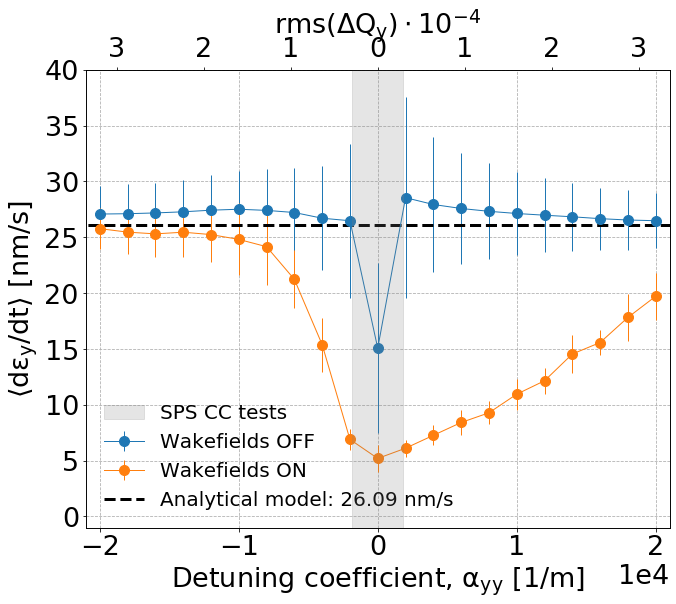

In [24]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))

ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory]) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.3), frameon=False) # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS.png', bbox_inches='tight')

### IPAC style

In [28]:
params = {'legend.fontsize': 30,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

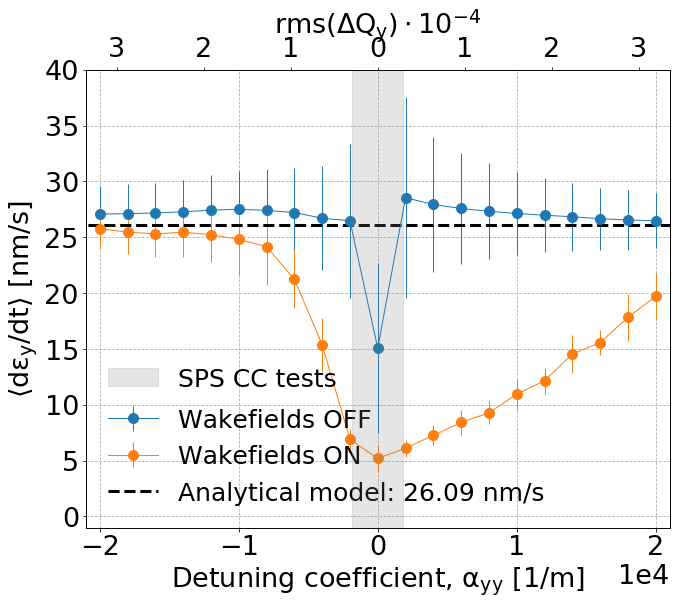

In [25]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))


ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory], fontsize=25) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, fontsize=25) # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_IPAC.png', bbox_inches='tight')

In [25]:
np.mean(my_df_1['ayy_2000.0']['m'])*1e9

28.53868040574884

In [26]:
np.mean(my_df_2['ayy_2000.0']['m'])*1e9

6.099808757994768